In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])


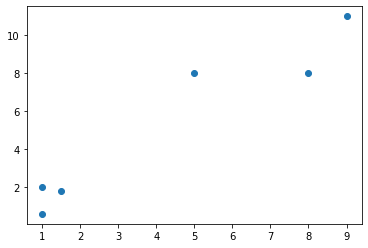

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [14]:
#Fit function
#Arguments would be the data, number of clusters and the maximum number of iterations
def fit1(data,k=2,max_iter=100):
#The data to be maintained --> 
#1)list of mean values. Initially it will be randomly initialized and eventually will be updated. 
#2) Cluster information i.e. which point belongs to which cluster. An array of arrays with k entries, 
#each entry represents what all data points are in that cluster. Find the new mean values. Need to know all 
#the points present in each cluster to find the mean value
    means=[] #randomly initialize the means
    
    #Picking the first k data points and assigning them to be our initial means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        #Assign the data points to the cluster that they belong to
        #Create empty clusters
        clusters=[] #Will have the cluster information. This will have k sub-arrays (array of arrays as dicussed above)
        for j in range(k):
            clusters.append([]) #Everytime I start a new iteration, going to start with an empty cluster since data 
            #points will be reassigned to the cluster. We're going to have some means, assign the data points to
            # some clusters, calculate the new means and then assign the data points to the new clusters
        #Going through each data point
        for point in data:
            #find distance to all the mean values
            distances=[((point-m)**2).sum()for m in means] # Taking sum of squares of element-wise subtraction
            
            #find the minimum distance
            minDistance=min(distances) #Taking minium value from the distances array
            
            #find the mean for which we got the minimum distance --> l
            l=distances.index(minDistance) #l is basically the index of the minDistance obtained above, the cluster the
            #point belongs to
            
            #add this point to cluster l
            clusters[l].append(point) #Add this point to that particular cluster
            
        
        
        #Calculate the new mean values
        #go through each of the clusters 
        for j in range(k):
            new_mean=np.average(clusters[j]) #Taking average of jth cluster
            #update the jth mean
            means[j]=new_mean
    return means

In [15]:
fit1(X)
#There is a small problem here. I was expecting 2 means since I've used 2 clusters where each mean is basically a 
#combination of (x,y). This doesn't look correct.
#The problem is that you need to pass the axis in 'new_mean=np.average(clusters[j])'. Right now it is finding
#the average of cluster j of all the points and combines the x and y values

[1.3166666666666667, 8.166666666666666]

In [16]:
#Fit function with the changes incorporated for above

#Arguments would be the data, number of clusters and the maximum number of iterations
def fit2(data,k=2,max_iter=100):
#The data to be maintained --> 
#1)list of mean values. Initially it will be randomly initialized and eventually will be updated. 
#2) Cluster information i.e. which point belongs to which cluster. An array of arrays with k entries, 
#each entry represents what all data points are in that cluster. Find the new mean values. Need to know all 
#the points present in each cluster to find the mean value
    means=[] #randomly initialize the means
    
    #Picking the first k data points and assigning them to be our initial means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        #Assign the data points to the cluster that they belong to
        #Create empty clusters
        clusters=[] #Will have the cluster information. This will have k sub-arrays (array of arrays as dicussed above)
        for j in range(k):
            clusters.append([]) #Everytime I start a new iteration, going to start with an empty cluster since data 
            #points will be reassigned to the cluster. We're going to have some means, assign the data points to
            # some clusters, calculate the new means and then assign the data points to the new clusters
        #Going through each data point
        for point in data:
            #find distance to all the mean values
            distances=[((point-m)**2).sum()for m in means] # Taking sum of squares of element-wise subtraction
            
            #find the minimum distance
            minDistance=min(distances) #Taking minium value from the distances array
            
            #find the mean for which we got the minimum distance --> l
            l=distances.index(minDistance) #l is basically the index of the minDistance obtained above, the cluster the
            #point belongs to
            
            #add this point to cluster l
            clusters[l].append(point) #Add this point to that particular cluster
            
        
        
        #Calculate the new mean values
        #go through each of the clusters 
        for j in range(k):
            new_mean=np.average(clusters[j],axis=0) #Taking average of jth cluster
            #update the jth mean
            means[j]=new_mean
    return means

In [17]:
fit2(X)
#Now this gives us the 2 means that we require with the x and y values

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [18]:
#If there is an iteration after which there is no change at all in the mean values, then I want to stop early

#Fit function with stopping early criteria

#Arguments would be the data, number of clusters and the maximum number of iterations
def fit3(data,k=2,max_iter=100):
#The data to be maintained --> 
#1)list of mean values. Initially it will be randomly initialized and eventually will be updated. 
#2) Cluster information i.e. which point belongs to which cluster. An array of arrays with k entries, 
#each entry represents what all data points are in that cluster. Find the new mean values. Need to know all 
#the points present in each cluster to find the mean value
    means=[] #randomly initialize the means
    
    #Picking the first k data points and assigning them to be our initial means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        #Assign the data points to the cluster that they belong to
        #Create empty clusters
        clusters=[] #Will have the cluster information. This will have k sub-arrays (array of arrays as dicussed above)
        for j in range(k):
            clusters.append([]) #Everytime I start a new iteration, going to start with an empty cluster since data 
            #points will be reassigned to the cluster. We're going to have some means, assign the data points to
            # some clusters, calculate the new means and then assign the data points to the new clusters
        #Going through each data point
        for point in data:
            #find distance to all the mean values
            distances=[((point-m)**2).sum()for m in means] # Taking sum of squares of element-wise subtraction
            
            #find the minimum distance
            minDistance=min(distances) #Taking minium value from the distances array
            
            #find the mean for which we got the minimum distance --> l
            l=distances.index(minDistance) #l is basically the index of the minDistance obtained above, the cluster the
            #point belongs to
            
            #add this point to cluster l
            clusters[l].append(point) #Add this point to that particular cluster
            
        
        
        #Calculate the new mean values
        change=False
        #go through each of the clusters 
        for j in range(k):
            new_mean=np.average(clusters[j],axis=0) #Taking average of jth cluster
            
            #You want to check if the new mean value and the old mean value are exactly the same and there is no change
            if not np.array_equal(means[j],new_mean): #To check if the two arrays are not equal
                change=True
                
            #update the jth mean
            means[j]=new_mean
        if not change: #This means that nothing has changed
            break #Not running anymore iterations
    return means

In [19]:
fit3(X)

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [20]:
#The fit function right now does not predict anything; it does not tell which point belongs to which category.
#It just tells us what are the means of these clusters. So we create a predict function for that

def predict(test_data,means):
    predictions=[]
    for point in test_data:
        #find distance to all the mean values
        distances=[((point-m)**2).sum()for m in means] # Taking sum of squares of element-wise subtraction
            
        #find the minimum distance
        minDistance=min(distances) #Taking minium value from the distances array
            
        #find the mean for which we got the minimum distance --> l
        l=distances.index(minDistance) #l is basically the index of the minDistance obtained above, the cluster the
        #point belongs to
        
        predictions.append(l)
    return predictions

In [22]:
means=fit3(X)
means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [23]:
predict(X,means) #Gives us the clusters to which these points belong

[0, 0, 1, 1, 0, 1]